# 7.2 전환율 테스트 개요

P(A>B)= 0.3165 
P(A<B)= 0.6835 


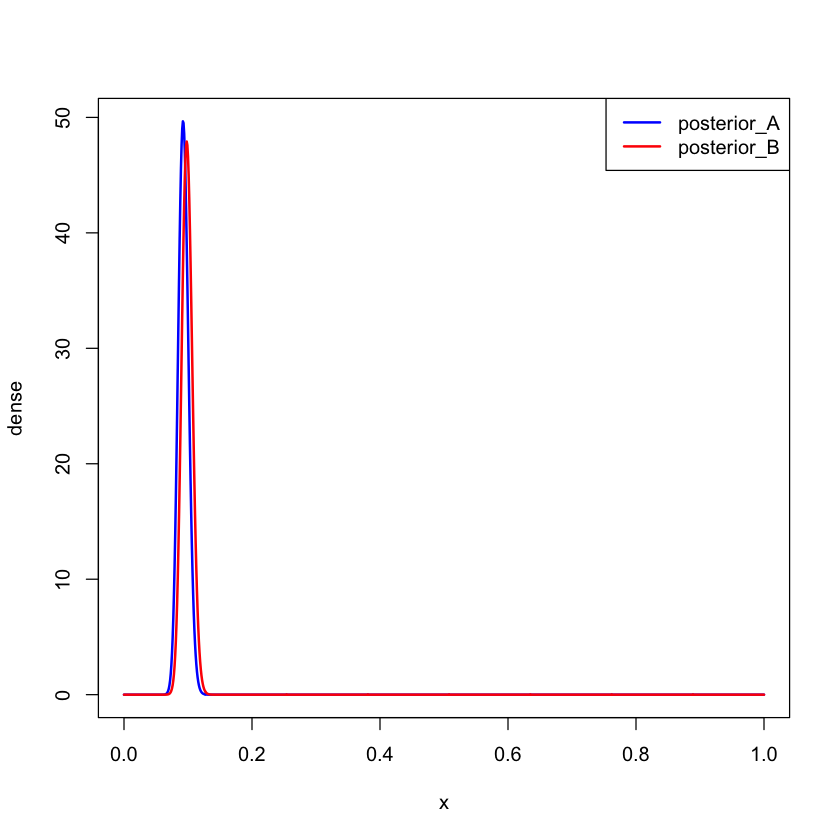

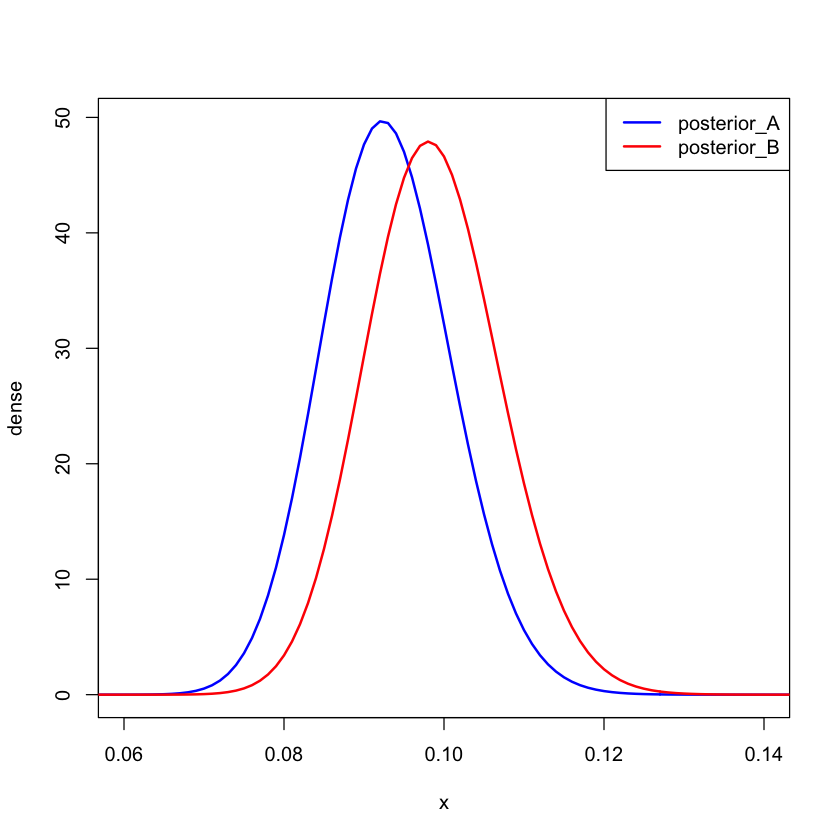

In [219]:
.libPaths("/Library/Frameworks/R.framework/Versions/4.2/Resources/library")

visitors_to_A <- 1300
visitors_to_B <- 1275

conversions_from_A <- 120
conversions_from_B <- 125

alpha_prior <- 1
beta_prior <- 1

parameter_A <- c(alpha_prior+conversions_from_A,beta_prior+visitors_to_A-conversions_from_A)
parameter_B <- c(alpha_prior+conversions_from_B,beta_prior+visitors_to_B-conversions_from_B)

sample_posterior_A<-rbeta(2000,parameter_A[1],parameter_A[2])
sample_posterior_B<-rbeta(2000,parameter_B[1],parameter_B[2])

cat("P(A>B)=",mean(sample_posterior_A>sample_posterior_B),'\n')
cat("P(A<B)=",mean(sample_posterior_A<sample_posterior_B),'\n')

x<-seq(0,1,by=0.001)
plot(x,dbeta(x,parameter_A[1],parameter_A[2]),type="l",col='blue',lwd=2,ylab='dense')
lines(x,dbeta(x,parameter_B[1],parameter_B[2]),type="l",col='red',lwd=2)
legend('topright',c('posterior_A','posterior_B'),col=c('blue','red'),lwd=2)

plot(x,dbeta(x,parameter_A[1],parameter_A[2]),type="l",col='blue',lwd=2,ylab='dense',xlim=c(0.06,0.14))
lines(x,dbeta(x,parameter_B[1],parameter_B[2]),type="l",col='red',lwd=2)
legend('topright',c('posterior_A','posterior_B'),col=c('blue','red'),lwd=2)

# 7.3 선형손실함수 추가하기

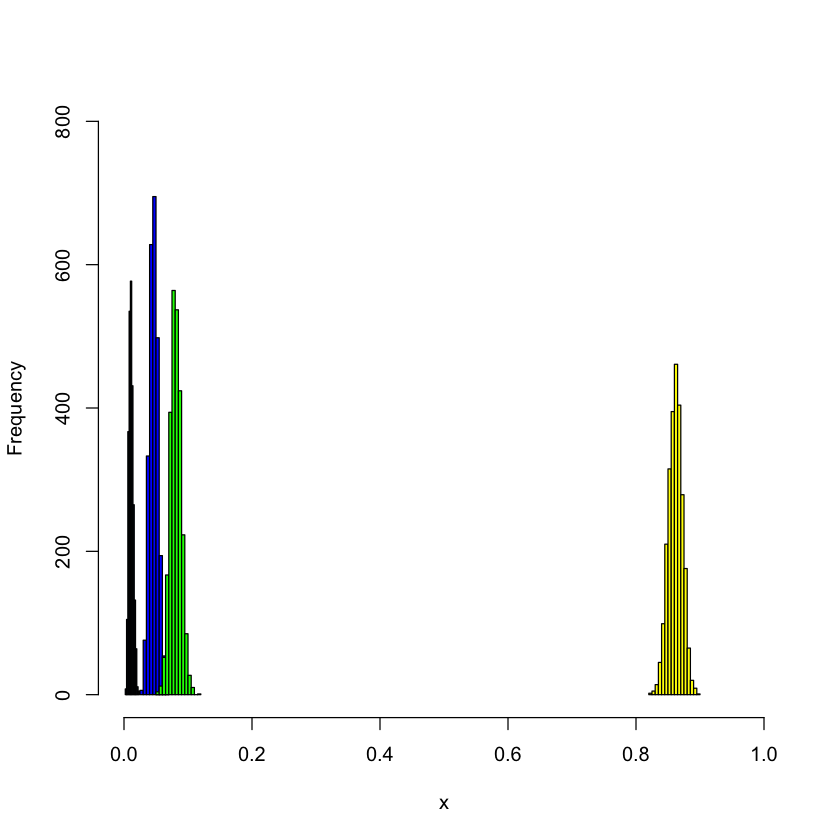

In [220]:
library("gtools")
N<-1000
N_79<-10
N_49<-46
N_25<-80
N_0<-N-(N_79+N_49+N_25)
observations<-c(N_79,N_49,N_25,N_0)

prior_parameters<-rep(1,4)
posterior_samples<-rdirichlet(2500,prior_parameters+observations)

hist(posterior_samples[,1],col="steelblue",xlim=c(0,1),xlab='x',main='',ylim=c(0,800))
hist(posterior_samples[,2],col="blue",add=TRUE)
hist(posterior_samples[,3],col="green",add=TRUE)
hist(posterior_samples[,4],col="yellow",add=TRUE)

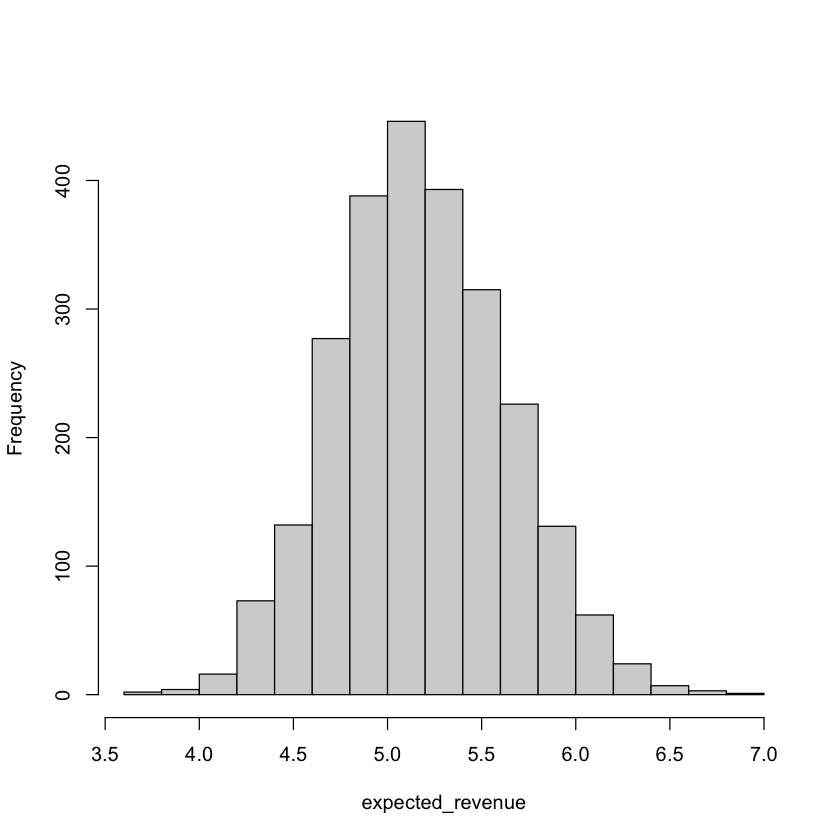

In [222]:
expected_revenue<-posterior_samples%*%c(79,49,25,0)
hist(expected_revenue,main='')

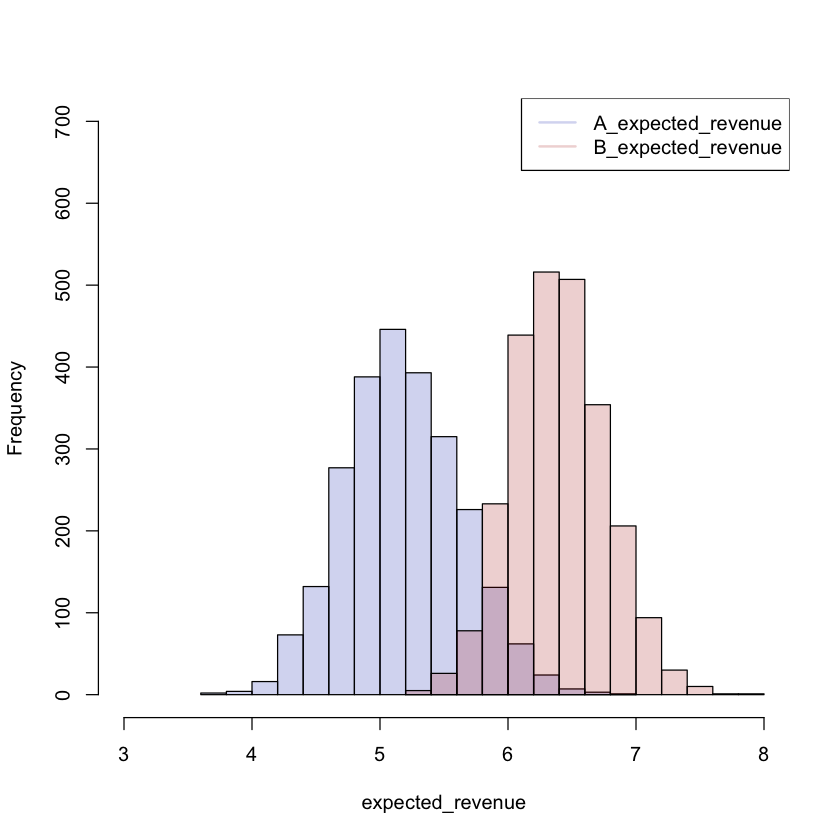

P(A<B) =  0.9772

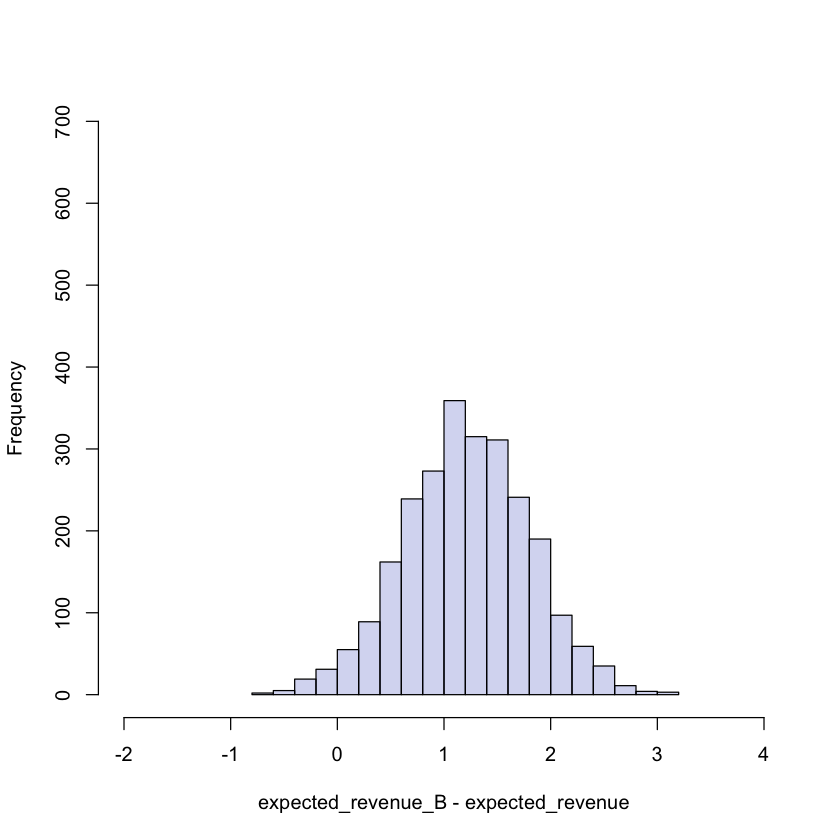

In [223]:
N_B<-2000
N_B_79<-45
N_B_49<-84
N_B_25<-200
N_B_0<-N_B-(N_B_79+N_B_49+N_B_25)
observations_B<-c(N_B_79,N_B_49,N_B_25,N_B_0)

prior_parameters<-rep(1,4)
posterior_samples_B<-rdirichlet(2500,prior_parameters+observations_B)


expected_revenue_B<-posterior_samples_B%*%c(79,49,25,0)

hist(expected_revenue,xlim=c(3,8),ylim=c(0,700),main='',col='#002DB330')
hist(expected_revenue_B,add=TRUE,col='#B3000030')
legend('topright',c('A_expected_revenue','B_expected_revenue'),col=c('#002DB330','#B3000030'),lwd=2)



hist(expected_revenue_B-expected_revenue,breaks=15,xlim=c(-2,4),ylim=c(0,700),main='',col='#002DB330')




cat("P(A<B) = ",mean(expected_revenue < expected_revenue_B))

# 7.4 전환율을 넘어서 t-검정

In [218]:
N<-250
mu_A<-30;std_A<-4;
mu_B<-26;std_B<-7;

durations_A<-rnorm(N,mu_A,std_A)
durations_B<-rnorm(N,mu_B,std_B)

pooled_mean<-c(mean(c(durations_A,durations_B)))
pooled_std<-c(sd(c(durations_A,durations_B)))
tau<-1000*pooled_std

prior_parameter_A <- c(pooled_mean,tau)
prior_parameter_B <- c(pooled_mean,tau)

ERROR: Error: package or namespace load failed for ‘tolerance’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 ‘rgl’이라고 불리는 패키지가 없습니다


# 7.5 증분 추정하기

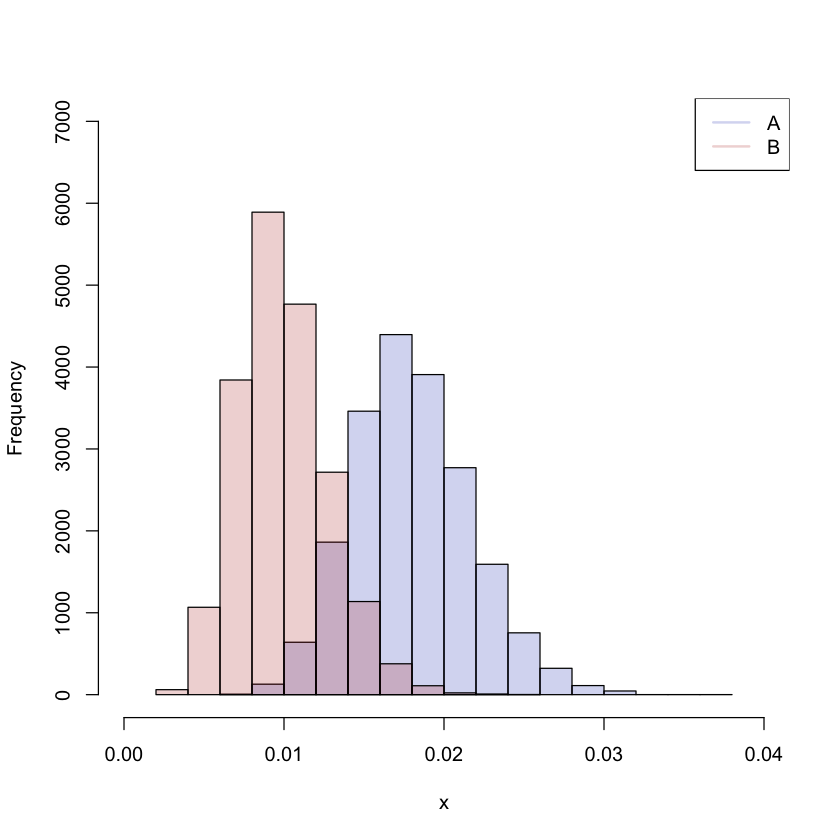

In [225]:
visitors_to_A <- 1275
visitors_to_B <- 1300

conversions_from_A <- 22
conversions_from_B <- 12

alpha_prior <- 1
beta_prior <- 1

parameter_A <- c(alpha_prior+conversions_from_A,beta_prior+visitors_to_A-conversions_from_A)
parameter_B <- c(alpha_prior+conversions_from_B,beta_prior+visitors_to_B-conversions_from_B)

samples<-20000
sample_posterior_A<-rbeta(samples,parameter_A[1],parameter_A[2])
sample_posterior_B<-rbeta(samples,parameter_B[1],parameter_B[2])

hist(sample_posterior_A,col="#002DB330",xlab='x',main='',xlim=c(0,0.040),ylim=c(0,7000))
hist(sample_posterior_B,col="#B3000030",add=TRUE)
legend('topright',c('A','B'),col=c('#002DB330','#B3000030'),lwd=2)

P(posterior_rel_increase>0.2) =  0.89345 
P(posterior_rel_increase>0.5) =  0.71975 


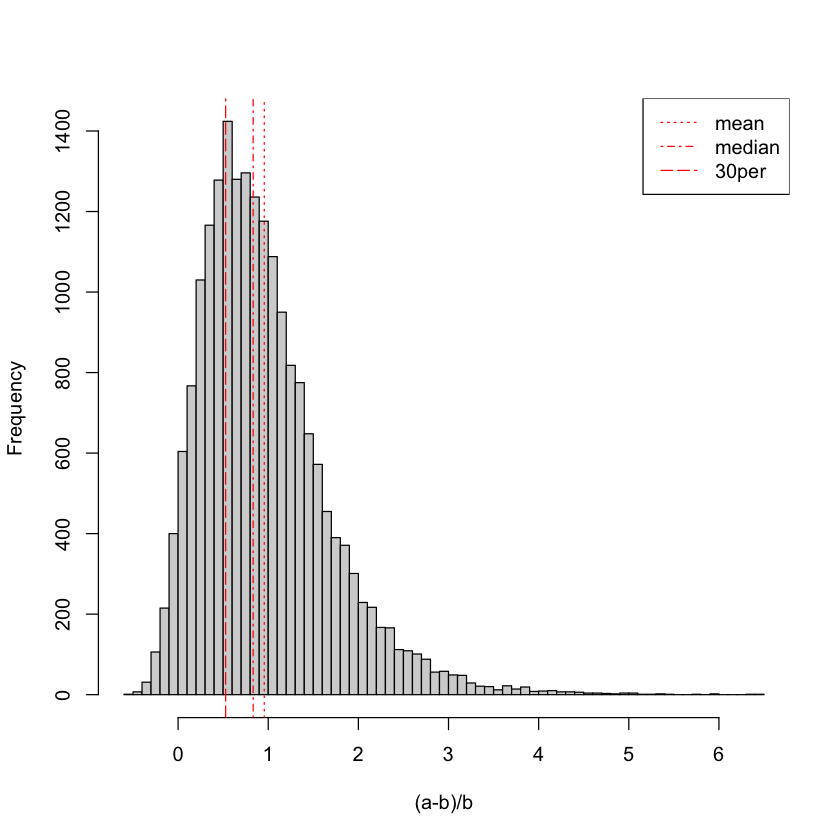

In [226]:
posterior_rel_increase<-(sample_posterior_A-sample_posterior_B)/sample_posterior_B
hist(posterior_rel_increase,xlab='(a-b)/b',breaks=50,main='')
abline(v=mean(posterior_rel_increase),lty=3,col='red')
abline(v=median(posterior_rel_increase),lty=4,col='red')
abline(v=quantile(posterior_rel_increase,p=0.3),lty=5,col='red')
legend('topright',c('mean','median','30per'),lty=3:5,col='red')

cat("P(posterior_rel_increase>0.2) = ",mean(posterior_rel_increase>0.2),'\n')
cat("P(posterior_rel_increase>0.5) = ",mean(posterior_rel_increase>0.5),'\n')

**30번째 퍼센타일 장점**
1. 과대추정의 벌점화-> 보수적인 추정
2. 데이터가 많아지면서 분산이 작아져 퍼센타일도 같은 점으로 수렴하게됨